In [3]:
import matplotlib.pyplot as plt
filenamepath ="/home/linux/Downloads/UrbanSound8K/fold5/100032-3-0-0.wav"

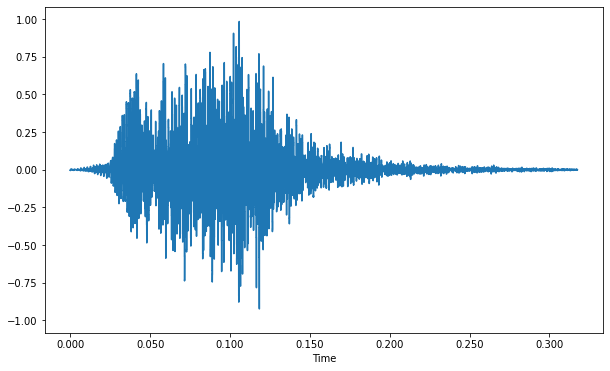

In [4]:
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
plt.figure(figsize=(10,6))
data,sample_rate=librosa.load(filenamepath)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filenamepath)

In [5]:
print(data)

[-0.00341243 -0.00506065 -0.00463294 ... -0.00247565 -0.00155365
 -0.00035246]


In [6]:
sample_rate
from scipy.io import wavfile as wav

In [7]:
wav_sample_rate,wave_audio=wav.read(filenamepath)

In [8]:
wav_sample_rate


44100

In [9]:
wave_audio

array([[-150, -148],
       [-160, -157],
       [-151, -151],
       ...,
       [ -19,  -24],
       [ -14,  -18],
       [   1,   -1]], dtype=int16)

In [10]:
data

array([-0.00341243, -0.00506065, -0.00463294, ..., -0.00247565,
       -0.00155365, -0.00035246], dtype=float32)

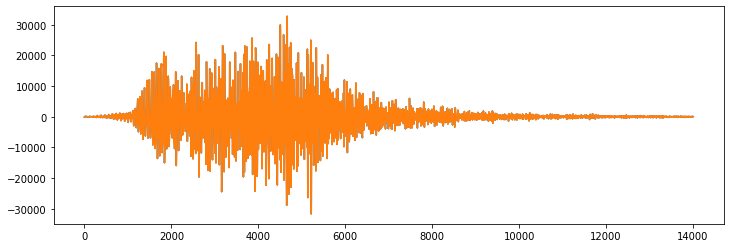

In [11]:
#audio two channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

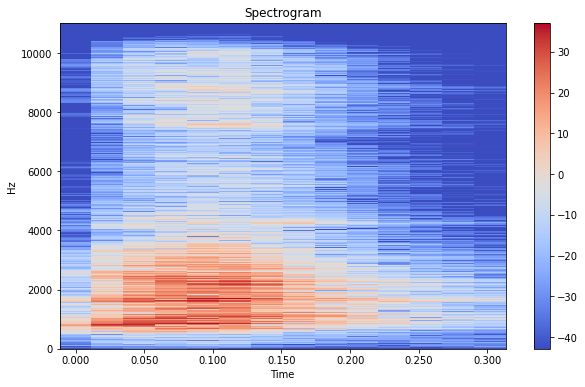

In [12]:
k,sr =librosa.load(filenamepath)
k = librosa.stft(k)
kdb =librosa.amplitude_to_db(abs(k))
plt.figure(figsize=(10,6))
librosa.display.specshow(kdb, sr = sr, x_axis = 'time', y_axis ='hz')
plt.title("Spectrogram")
plt.colorbar()

In [13]:
import pandas as pd
#filenamepath='UrbanSound8K/audio/'
metadata=pd.read_csv('/home/linux/Downloads/UrbanSound8K/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [14]:
##check wheather the dataset
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [15]:
mfcc = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfcc.shape)

(40, 14)


In [16]:
mfcc

array([[-3.33381683e+02, -1.72863129e+02, -9.40941391e+01,
        -6.08684845e+01, -4.41376152e+01, -5.44880638e+01,
        -1.02810043e+02, -1.62934692e+02, -2.18384140e+02,
        -2.69521057e+02, -3.17539673e+02, -3.56184967e+02,
        -3.90383057e+02, -4.23442291e+02],
       [ 1.21305176e+02,  8.79235916e+01,  6.71250916e+01,
         5.37605438e+01,  4.45976105e+01,  3.95891571e+01,
         3.58199539e+01,  3.90013199e+01,  4.81058044e+01,
         5.88260994e+01,  7.00460663e+01,  7.97228088e+01,
         8.62174606e+01,  9.20240936e+01],
       [-1.04763962e+02, -1.24708679e+02, -1.34922775e+02,
        -1.42666565e+02, -1.48852753e+02, -1.50840805e+02,
        -1.45024185e+02, -1.34190659e+02, -1.29958038e+02,
        -1.25843033e+02, -1.16082420e+02, -1.11183174e+02,
        -1.04966354e+02, -9.31502838e+01],
       [-5.07055054e+01, -5.74591599e+01, -6.85044403e+01,
        -7.35098648e+01, -7.03765411e+01, -6.93609314e+01,
        -6.84460678e+01, -6.24659882e+01, -6.

In [17]:
def feature_extractor(file):
    data,sample_rate = librosa.load(filenamepath,res_type='kaiser_fast')
    mfcc_feature = librosa.feature.mfcc(y = data,sr=sample_rate,n_mfcc=40)
    mfcc_scaled_feature = np.mean(mfcc_feature.T,axis=0)
    return mfcc_scaled_feature

In [18]:
import os
from tqdm import tqdm
extracted_feature=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_names = os.path.join(os.path.abspath(filenamepath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_names)
    extracted_feature.append([data,final_class_labels])

8732it [5:48:52,  2.40s/it]  


In [19]:
import pandas as pd
extracted_feature_df =pd.DataFrame(extracted_feature,columns=['feature','class'])
extracted_feature_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-217.35526, 70.22338, -130.38527, -53.282898,...",children_playing
2,"[-217.35526, 70.22338, -130.38527, -53.282898,...",children_playing
3,"[-217.35526, 70.22338, -130.38527, -53.282898,...",children_playing
4,"[-217.35526, 70.22338, -130.38527, -53.282898,...",children_playing


In [20]:
x=np.array(extracted_feature_df['feature'].tolist())
y=np.array(extracted_feature_df['class'].tolist())

In [21]:
y=np.array(pd.get_dummies(y))

In [22]:
x.shape

(8732, 40)

In [23]:
y.shape

(8732, 10)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0)

In [25]:
x_train.shape

(5675, 40)

In [26]:
x_test.shape

(3057, 40)

In [27]:
y_train.shape

(5675, 10)

In [28]:
y_test.shape

(3057, 10)

# model creation

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
num_labels=y.shape[1]

In [32]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


2023-01-23 06:01:23.845233: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-01-23 06:01:23.845272: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: linux-HP-Laptop-15-da0xxx
2023-01-23 06:01:23.845283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: linux-HP-Laptop-15-da0xxx
2023-01-23 06:01:23.845475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.108.3
2023-01-23 06:01:23.845506: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.78.1
2023-01-23 06:01:23.845515: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 525.78.1 does not match DSO version 510.108.3 -- cannot find working devices in t

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs =100
num_batch_size =32
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hd5',verbose=1,save_best_only=True)
start =datetime.now()
model.fit(x_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(x_test,y_test),callbacks=[checkpointer])
duaration=datetime.now()-start


Epoch 1/100
170/178 [===========================>..] - ETA: 0s - loss: 7.7970 - accuracy: 0.1053
Epoch 1: val_loss improved from inf to 2.29174, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 5s 15ms/step - loss: 7.5725 - accuracy: 0.1043 - val_loss: 2.2917 - val_accuracy: 0.1178
Epoch 2/100
176/178 [============================>.] - ETA: 0s - loss: 2.2999 - accuracy: 0.1112
Epoch 2: val_loss improved from 2.29174 to 2.28019, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 11ms/step - loss: 2.2999 - accuracy: 0.1110 - val_loss: 2.2802 - val_accuracy: 0.1086
Epoch 3/100
162/178 [==========================>...] - ETA: 0s - loss: 2.2741 - accuracy: 0.1163
Epoch 3: val_loss improved from 2.28019 to 2.27058, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 11ms/step - loss: 2.2736 - accuracy: 0.1177 - val_loss: 2.2706 - val_accuracy: 0.1086
Epoch 4/100
161/178 [==========================>...] - ETA: 0s - loss: 2.2652 - accuracy: 0.1132
Epoch 4: val_loss improved from 2.27058 to 2.26595, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 12ms/step - loss: 2.2659 - accuracy: 0.1119 - val_loss: 2.2660 - val_accuracy: 0.1086
Epoch 5/100
163/178 [==========================>...] - ETA: 0s - loss: 2.2626 - accuracy: 0.1148
Epoch 5: val_loss improved from 2.26595 to 2.26399, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 11ms/step - loss: 2.2625 - accuracy: 0.1137 - val_loss: 2.2640 - val_accuracy: 0.1086
Epoch 6/100
176/178 [============================>.] - ETA: 0s - loss: 2.2605 - accuracy: 0.1209
Epoch 6: val_loss improved from 2.26399 to 2.26267, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 11ms/step - loss: 2.2605 - accuracy: 0.1205 - val_loss: 2.2627 - val_accuracy: 0.1086
Epoch 7/100
164/178 [==========================>...] - ETA: 0s - loss: 2.2607 - accuracy: 0.1122
Epoch 7: val_loss improved from 2.26267 to 2.26233, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 11ms/step - loss: 2.2606 - accuracy: 0.1152 - val_loss: 2.2623 - val_accuracy: 0.1086
Epoch 8/100
164/178 [==========================>...] - ETA: 0s - loss: 2.2600 - accuracy: 0.1117
Epoch 8: val_loss improved from 2.26233 to 2.26202, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 11ms/step - loss: 2.2583 - accuracy: 0.1110 - val_loss: 2.2620 - val_accuracy: 0.1086
Epoch 9/100
166/178 [==========================>...] - ETA: 0s - loss: 2.2571 - accuracy: 0.1169
Epoch 9: val_loss improved from 2.26202 to 2.26194, saving model to saved_models/audio_classification.hd5


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 13ms/step - loss: 2.2581 - accuracy: 0.1179 - val_loss: 2.2619 - val_accuracy: 0.1086
Epoch 10/100
164/178 [==========================>...] - ETA: 0s - loss: 2.2571 - accuracy: 0.1107
Epoch 10: val_loss did not improve from 2.26194
178/178 [==============================] - 1s 4ms/step - loss: 2.2591 - accuracy: 0.1101 - val_loss: 2.2620 - val_accuracy: 0.1086
Epoch 11/100
167/178 [===========================>..] - ETA: 0s - loss: 2.2597 - accuracy: 0.1076
Epoch 11: val_loss did not improve from 2.26194
178/178 [==============================] - 1s 4ms/step - loss: 2.2583 - accuracy: 0.1105 - val_loss: 2.2621 - val_accuracy: 0.1096
Epoch 12/100
164/178 [==========================>...] - ETA: 0s - loss: 2.2568 - accuracy: 0.1199
Epoch 12: val_loss did not improve from 2.26194
178/178 [==============================] - 1s 4ms/step - loss: 2.2576 - accuracy: 0.1191 - val_loss: 2.2622 - val_accuracy: 0.1096
Epoch 13/100
176/178 [===============

INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


INFO:tensorflow:Assets written to: saved_models/audio_classification.hd5/assets


178/178 [==============================] - 2s 11ms/step - loss: 2.2580 - accuracy: 0.1105 - val_loss: 2.2619 - val_accuracy: 0.1096
Epoch 15/100
163/178 [==========================>...] - ETA: 0s - loss: 2.2600 - accuracy: 0.1083
Epoch 15: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2583 - accuracy: 0.1077 - val_loss: 2.2621 - val_accuracy: 0.1086
Epoch 16/100
163/178 [==========================>...] - ETA: 0s - loss: 2.2588 - accuracy: 0.1108
Epoch 16: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2578 - accuracy: 0.1094 - val_loss: 2.2621 - val_accuracy: 0.1096
Epoch 17/100
161/178 [==========================>...] - ETA: 0s - loss: 2.2586 - accuracy: 0.1145
Epoch 17: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2577 - accuracy: 0.1140 - val_loss: 2.2620 - val_accuracy: 0.1096
Epoch 18/100
163/178 [===============

165/178 [==========================>...] - ETA: 0s - loss: 2.2590 - accuracy: 0.1174
Epoch 44: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2572 - accuracy: 0.1159 - val_loss: 2.2620 - val_accuracy: 0.1096
Epoch 45/100
162/178 [==========================>...] - ETA: 0s - loss: 2.2569 - accuracy: 0.1169
Epoch 45: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2570 - accuracy: 0.1191 - val_loss: 2.2621 - val_accuracy: 0.1086
Epoch 46/100
163/178 [==========================>...] - ETA: 0s - loss: 2.2580 - accuracy: 0.1168
Epoch 46: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2571 - accuracy: 0.1163 - val_loss: 2.2621 - val_accuracy: 0.1096
Epoch 47/100
163/178 [==========================>...] - ETA: 0s - loss: 2.2582 - accuracy: 0.1137
Epoch 47: val_loss did not improve from 2.26187
178/178 [===========================

Epoch 74/100
161/178 [==========================>...] - ETA: 0s - loss: 2.2560 - accuracy: 0.1182
Epoch 74: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2572 - accuracy: 0.1167 - val_loss: 2.2622 - val_accuracy: 0.1096
Epoch 75/100
160/178 [=========================>....] - ETA: 0s - loss: 2.2552 - accuracy: 0.1184
Epoch 75: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2571 - accuracy: 0.1165 - val_loss: 2.2622 - val_accuracy: 0.1096
Epoch 76/100
176/178 [============================>.] - ETA: 0s - loss: 2.2568 - accuracy: 0.1124
Epoch 76: val_loss did not improve from 2.26187
178/178 [==============================] - 1s 4ms/step - loss: 2.2571 - accuracy: 0.1128 - val_loss: 2.2622 - val_accuracy: 0.1096
Epoch 77/100
163/178 [==========================>...] - ETA: 0s - loss: 2.2563 - accuracy: 0.1191
Epoch 77: val_loss did not improve from 2.26187
178/178 [==============

In [36]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.10860320925712585
